<a href="https://colab.research.google.com/github/Pageblan/Greatkart/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # Create a DataFrame from the iris data
iris_df['target'] = iris.target # Add the target variable to the DataFrame
iris_df.head() # Now you can use .head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

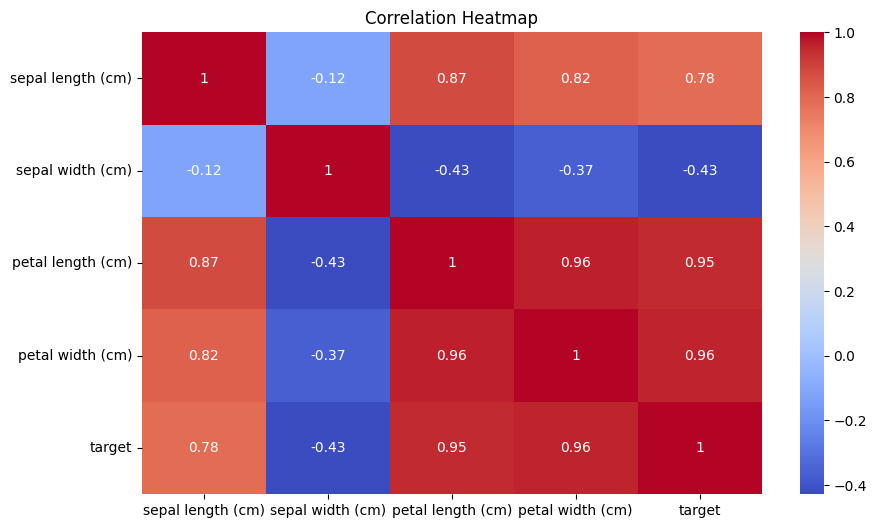

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# divide the data into features(x) and target(y)
x = iris_df[iris_df.columns [:-1]].values
y = iris_df[iris_df.columns[-1]].values

In [8]:
#split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Decion Trees

In [9]:
#fit the data into decision trees classifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

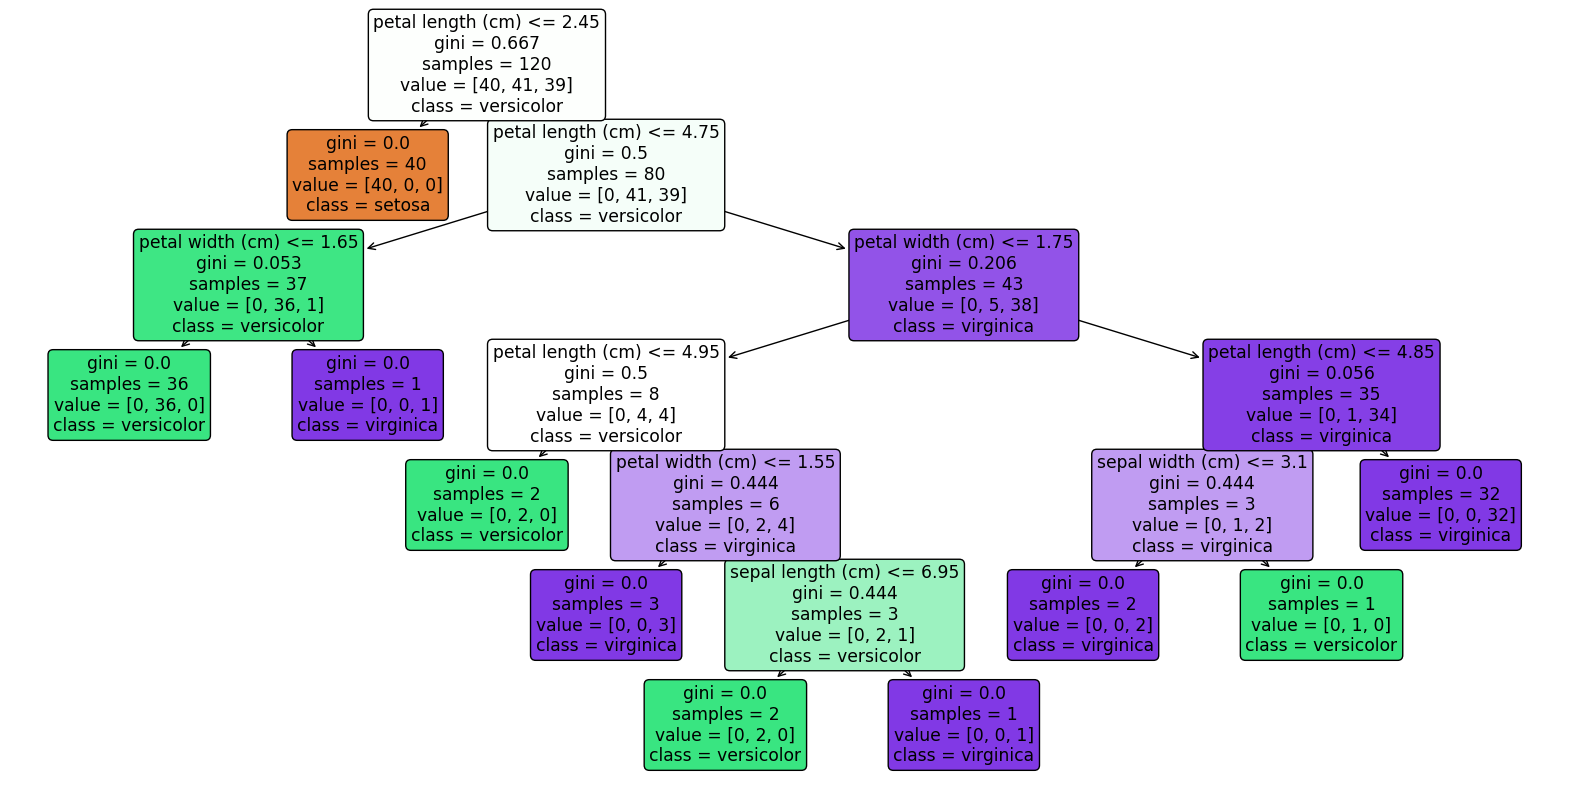

In [12]:
#plot the tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

In [ ]:
#Print the accuracy score
x_pred = classifier.predict(x_test,)
accuracy = accuracy_score(y_test, x_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


Post-Pruning Method

In [ ]:
# Train a full decision tree
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Get the cost complexity pruning path
path = classifier.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
# Train multiple trees with different values of ccp_alpha
classifiers = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    classifiers.append(clf)

In [ ]:
# Evaluate the classifiers and select the best one based on validation performance
best_classifier = max(classifiers, key=lambda clf: clf.score(x_test, y_test))

# Print the best classifier's score
best_score = best_classifier.score(x_test, y_test)
print(f"Best classifier accuracy: {best_score * 100:.2f}%")

Best classifier accuracy: 100.00%


In [ ]:
# Train the model with best parameters
best_classifier.fit(x_train, y_train)
y_pred = best_classifier.predict(x_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



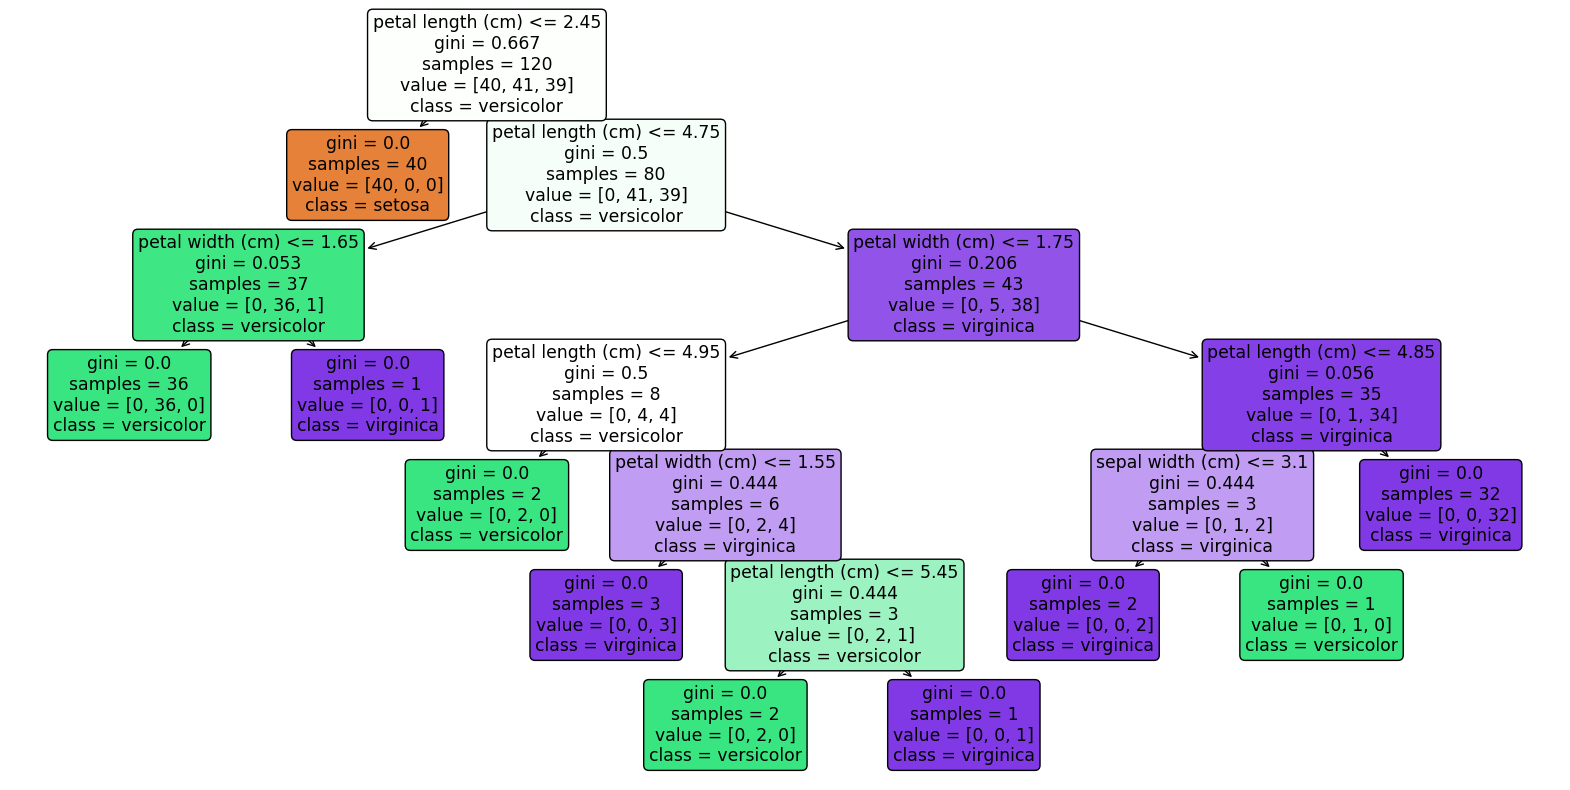

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_classifier, feature_names = iris_df.columns, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

HyperParameters and Grid search

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_classifier2 = grid_search.best_estimator_

In [ ]:
# Evaluate with cross-validation
scores = cross_val_score(best_classifier2, x, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean() * 100:.2f}%")

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.86666667 1.        ]
Mean cross-validation score: 94.67%


In [ ]:
# Train the model with best parameters
best_classifier2.fit(x_train, y_train)
y_pred = best_classifier.predict(x_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



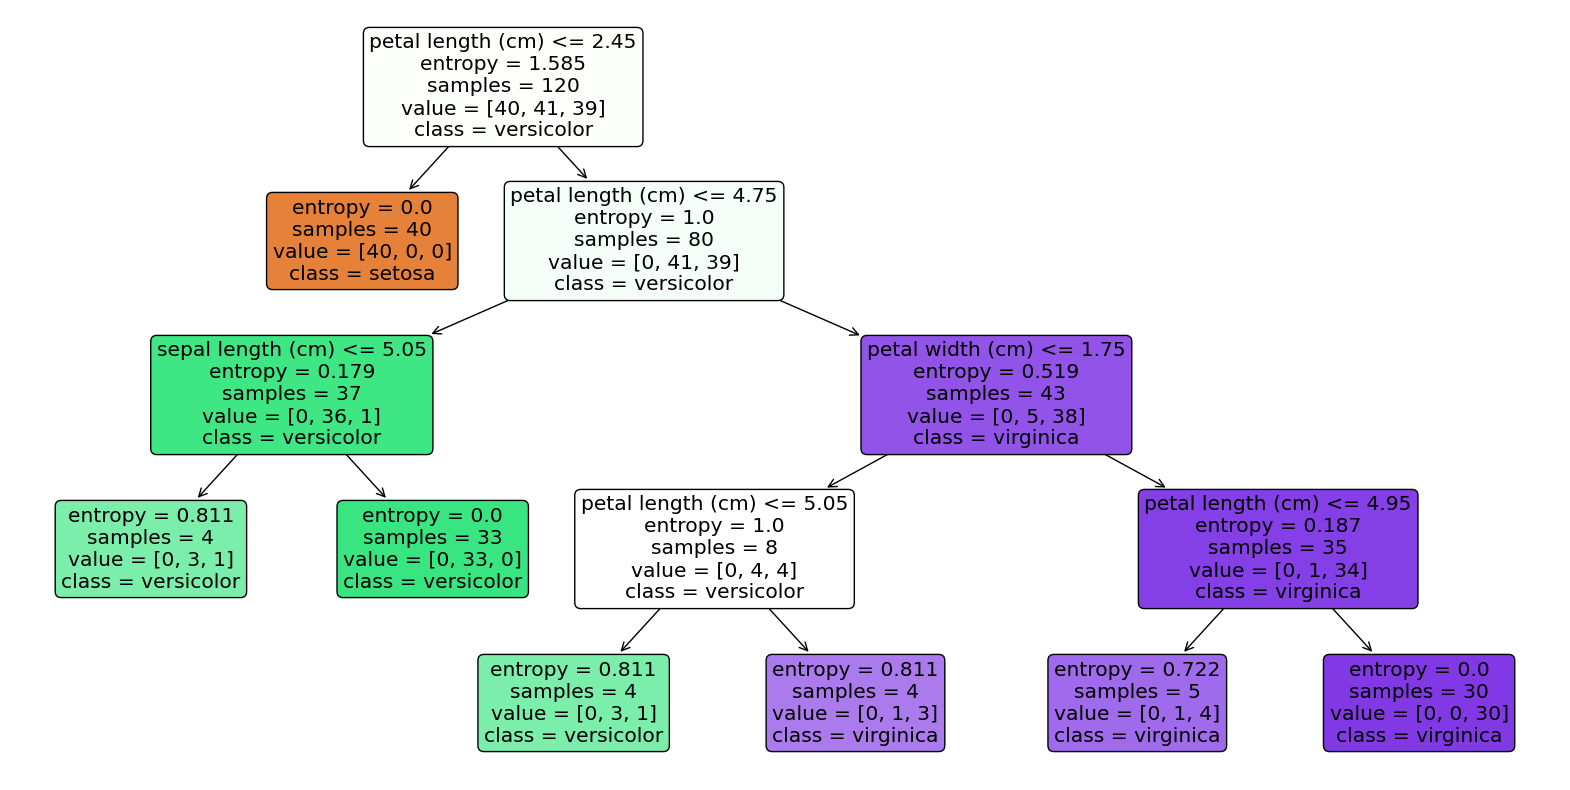

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_classifier2, feature_names = iris_df.columns, class_names=iris.target_names, filled=True, rounded=True)
plt.show()